# Working with Pressure Level Data

This tutorial demonstrates how to extract and analyze ERA5 pressure level data using varunayan. Unlike single-level variables (like 2-meter temperature), pressure level data provides vertical atmospheric profiles at specific pressure levels.

ERA5 pressure level data is available at these levels (in hPa):
- **Surface levels**: 1000, 975, 950, 925
- **Lower atmosphere**: 900, 875, 850, 825, 800, 775, 750, 700
- **Middle atmosphere**: 650, 600, 550, 500, 450, 400, 350, 300
- **Upper atmosphere**: 250, 225, 200, 175, 150, 125, 100, 70, 50, 30, 20, 10, 7, 5, 3, 2, 1


| Variable Code | Description | Units |
|---------------|-------------|-------|
| `t` | Temperature | K |
| `r` | Relative humidity | % |
| `q` | Specific humidity | kg/kg |
| `u` | U-component of wind | m/s |
| `v` | V-component of wind | m/s |
| `w` | Vertical velocity | Pa/s |
| `z` | Geopotential | m²/s² |
| `d` | Divergence | s⁻¹ |
| `vo` | Vorticity | s⁻¹ |



## Setup

In [1]:
import calendar
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import varunayan

warnings.filterwarnings("ignore")

# Set up plotting style
plt.style.use("default")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 11

print(f"varunayan version: {varunayan.__version__}")

varunayan version: 0.1.0


## Atmospheric Temperature Profile

Let's extract temperature data at multiple pressure levels to create an atmospheric temperature profile over India.

In [2]:
# Extract temperature at multiple pressure levels
df_temp_profile = varunayan.era5ify_geojson(
    request_id="temp_profile_india_2023",
    variables=["t"],  # Temperature
    pressure_levels=[
        "1000",
        "850",
        "700",
        "500",
        "300",
        "200",
    ],  # Different atmospheric levels
    start_date="2023-01-01",
    end_date="2023-12-31",
    json_file="https://gist.githubusercontent.com/JaggeryArray/26b6e4c09ce033305080253002c0ba76/raw/35d1ca0ca8ee64c4b5a0a8c4f22764cf6ac38bd4/india.geojson",
    frequency="monthly",
    resolution=0.25,  # Lower resolution for faster processing
    dataset_type="pressure",  # This is the key parameter!
)

print("Temperature profile data extraction completed!")
print(f"Output saved to: temp_profile_india_2023_output/")


STARTING ERA5 PRESSURE LEVEL PROCESSING
Request ID: temp_profile_india_2023
Variables: ['t']
Pressure Levels: ['1000', '850', '700', '500', '300', '200']
Date Range: 2023-01-01 to 2023-12-31
Frequency: monthly
Resolution: 0.25°
GeoJSON File: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/temp_profile_india_2023_temp_geojson.json


--- GeoJSON Mini Map ---

MINI MAP (Longitude: 68.18° to 97.38°, Latitude: 8.13° to 37.08°):
┌──────────────────────────────┐
│······························│
│······■■■■■■··················│
│·······■■■■■··················│
│······■■■■■■■·················│
│····■■■■■■■■■■···········■■■■·│
│··■■■■■■■■■■■■■■■■■■··■■■■■···│
│·■■■■■■■■■■■■■■■■■■■■··■■■····│
│··■■■■■■■■■■■■■■■■■···········│
│·····■■■■■■■■■■■■·············│
│·····■■■■■■■■■■···············│
│······■■■■■■··················│
│·······■■■■■··················│
│········■■■■··················│
│······························│
└──────────────────────────────┘
 ■ = Inside the shape
 · = Outside the shap

2025-10-12 17:20:36,903 INFO Request ID is 56d107f1-a0d3-4e6a-9772-500298476305
INFO:ecmwf.datastores.legacy_client:Request ID is 56d107f1-a0d3-4e6a-9772-500298476305
2025-10-12 17:20:37,074 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-10-12 17:20:46,124 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-10-12 17:20:51,368 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


24d1d4534ceeb348240019d4bb9cff69.nc:   0%|          | 0.00/1.53M [00:00<?, ?B/s]


Saving files to output directory: temp_profile_india_2023_output
  Saved final data to: temp_profile_india_2023_output/temp_profile_india_2023_monthly_data.csv
  Saved unique coordinates to: temp_profile_india_2023_output/temp_profile_india_2023_unique_latlongs.csv
  Saved raw data to: temp_profile_india_2023_output/temp_profile_india_2023_raw_data.csv

PROCESSING COMPLETE

RESULTS SUMMARY:
----------------------------------------
Variables processed: 1
Time period:         2023-01-01 to 2023-12-31
Final output shape:  (72, 5)
Total complete processing time: 19.75 seconds

First 5 rows of aggregated data:
            t  pressure_level  year  month    feature
0  293.515991          1000.0  2023      1  feature_0
1  297.903076          1000.0  2023      2  feature_0
2  299.780853          1000.0  2023      3  feature_0
3  303.042023          1000.0  2023      4  feature_0
4  304.408234          1000.0  2023      5  feature_0

ERA5 PRESSURE LEVEL PROCESSING COMPLETED SUCCESSFULLY
Tempera

In [3]:
# Load and examine the data
df_temp = pd.read_csv(
    "temp_profile_india_2023_output/temp_profile_india_2023_monthly_data.csv"
)

print("Dataset shape:", df_temp.shape)
print("\nColumns:", df_temp.columns.tolist())
print("\nFirst few rows:")
df_temp.head()

Dataset shape: (72, 5)

Columns: ['t', 'pressure_level', 'year', 'month', 'feature']

First few rows:


,t,pressure_level,year,month,feature
0,293.51600,1000.0,2023,1,feature_0
1,297.90308,1000.0,2023,2,feature_0
2,299.78085,1000.0,2023,3,feature_0
3,303.04202,1000.0,2023,4,feature_0
4,304.40823,1000.0,2023,5,feature_0


In [4]:
# Convert temperature from Kelvin to Celsius
df_temp["temperature_c"] = df_temp["t"] - 273.15

# Add month names for better plotting
df_temp["month_name"] = df_temp["month"].apply(lambda x: calendar.month_abbr[int(x)])

# Check pressure levels in our data
print("Available pressure levels (hPa):", sorted(df_temp["pressure_level"].unique()))
print(
    "Temperature range (°C):",
    f"{df_temp['temperature_c'].min():.1f} to {df_temp['temperature_c'].max():.1f}",
)

Available pressure levels (hPa): [np.float64(200.0), np.float64(300.0), np.float64(500.0), np.float64(700.0), np.float64(850.0), np.float64(1000.0)]
Temperature range (°C): -54.2 to 31.4


## Visualizing Atmospheric Temperature Profiles

Let's create visualizations to understand how temperature varies with altitude (pressure level).

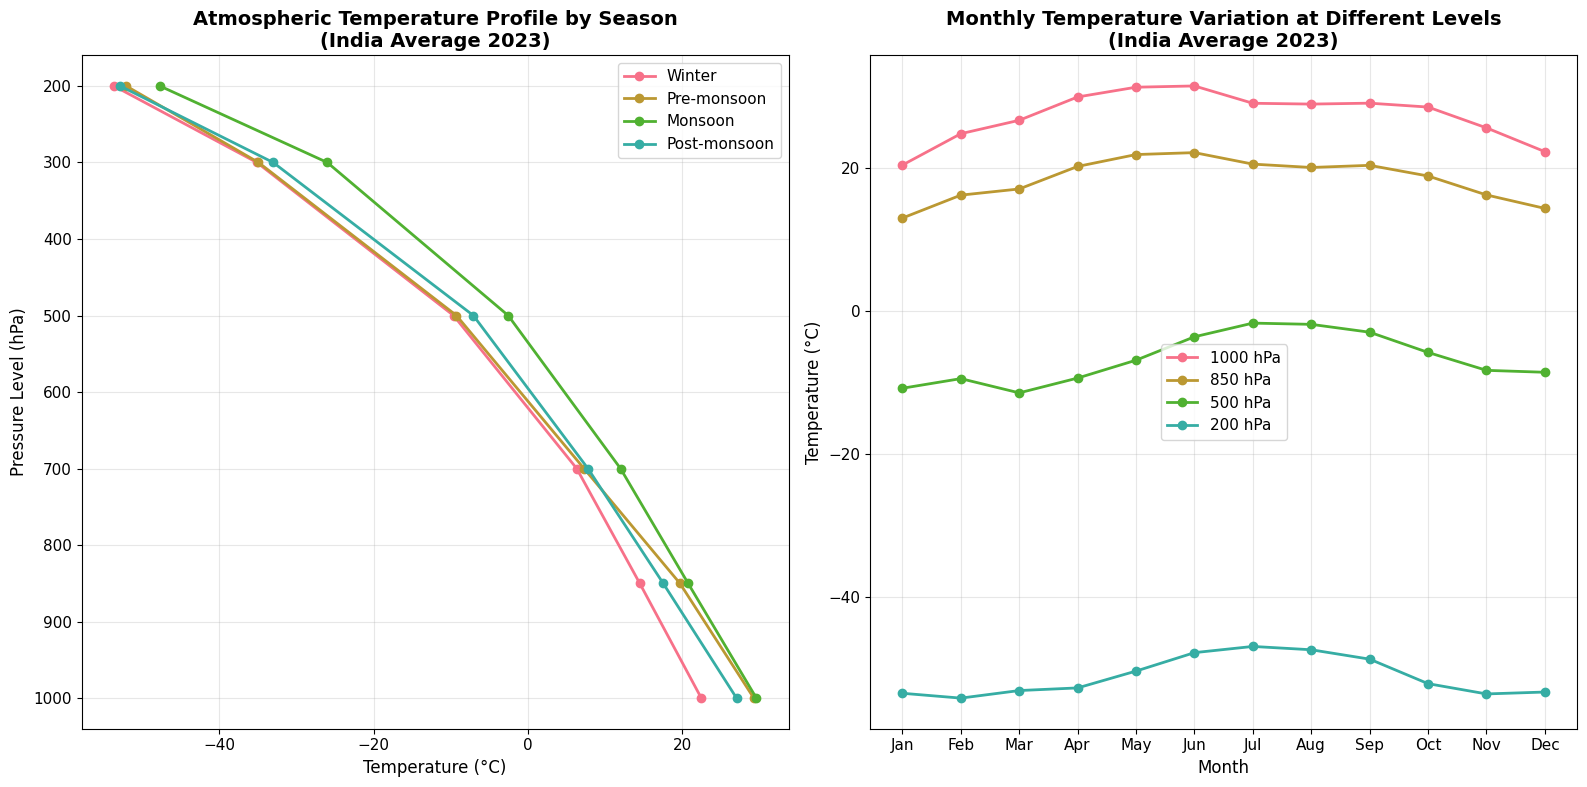

In [5]:
# Create atmospheric temperature profile for different seasons
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Define seasons
seasons = {
    "Winter": [12, 1, 2],
    "Pre-monsoon": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9],
    "Post-monsoon": [10, 11],
}

# Plot 1: Average temperature profile by season
for season, months in seasons.items():
    season_data = df_temp[df_temp["month"].isin(months)]
    avg_temp = season_data.groupby("pressure_level")["temperature_c"].mean()

    ax1.plot(
        avg_temp.values,
        avg_temp.index,
        marker="o",
        linewidth=2,
        markersize=6,
        label=season,
    )

ax1.set_ylabel("Pressure Level (hPa)", fontsize=12)
ax1.set_xlabel("Temperature (°C)", fontsize=12)
ax1.set_title(
    "Atmospheric Temperature Profile by Season\n(India Average 2023)",
    fontsize=14,
    fontweight="bold",
)
ax1.invert_yaxis()  # Higher altitude (lower pressure) at top
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Temperature variation throughout the year at different levels
key_levels = [1000, 850, 500, 200]  # Surface, low, mid, high atmosphere
monthly_avg = (
    df_temp.groupby(["month", "pressure_level"])["temperature_c"].mean().unstack()
)

for level in key_levels:
    if level in monthly_avg.columns:
        ax2.plot(
            monthly_avg.index,
            monthly_avg[level],
            marker="o",
            linewidth=2,
            markersize=6,
            label=f"{level} hPa",
        )

ax2.set_xlabel("Month", fontsize=12)
ax2.set_ylabel("Temperature (°C)", fontsize=12)
ax2.set_title(
    "Monthly Temperature Variation at Different Levels\n(India Average 2023)",
    fontsize=14,
    fontweight="bold",
)
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

## Multi-Variable Atmospheric Analysis

Now let's extract multiple atmospheric variables at key pressure levels to understand the full atmospheric state.

In [6]:
# Extract multiple atmospheric variables
df_atmos = varunayan.era5ify_geojson(
    request_id="atmospheric_profile_india_2023",
    variables=[
        "t",
        "r",
        "q",
        "u",
        "v",
    ],  # Temperature, RH, Specific humidity, Wind components
    pressure_levels=["1000", "850", "700", "500"],  # Key atmospheric levels
    start_date="2023-06-01",  # Monsoon season
    end_date="2023-09-30",
    json_file="https://gist.githubusercontent.com/JaggeryArray/26b6e4c09ce033305080253002c0ba76/raw/35d1ca0ca8ee64c4b5a0a8c4f22764cf6ac38bd4/india.geojson",
    frequency="monthly",
    resolution=0.25,
    dataset_type="pressure",
)


STARTING ERA5 PRESSURE LEVEL PROCESSING
Request ID: atmospheric_profile_india_2023
Variables: ['t', 'r', 'q', 'u', 'v']
Pressure Levels: ['1000', '850', '700', '500']
Date Range: 2023-06-01 to 2023-09-30
Frequency: monthly
Resolution: 0.25°
GeoJSON File: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/atmospheric_profile_india_2023_temp_geojson.json


--- GeoJSON Mini Map ---

MINI MAP (Longitude: 68.18° to 97.38°, Latitude: 8.13° to 37.08°):
┌──────────────────────────────┐
│······························│
│······■■■■■■··················│
│·······■■■■■··················│
│······■■■■■■■·················│
│····■■■■■■■■■■···········■■■■·│
│··■■■■■■■■■■■■■■■■■■··■■■■■···│
│·■■■■■■■■■■■■■■■■■■■■··■■■····│
│··■■■■■■■■■■■■■■■■■···········│
│·····■■■■■■■■■■■■·············│
│·····■■■■■■■■■■···············│
│······■■■■■■··················│
│·······■■■■■··················│
│········■■■■··················│
│······························│
└──────────────────────────────┘
 ■ = Inside the shape
 

2025-10-12 17:20:56,581 INFO Request ID is e4e87ae4-d9dd-4640-ae1b-aebdbb41446c
INFO:ecmwf.datastores.legacy_client:Request ID is e4e87ae4-d9dd-4640-ae1b-aebdbb41446c
2025-10-12 17:20:56,745 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-10-12 17:21:18,523 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


d27d5c5563bddd774d793c811cd7fbf7.nc:   0%|          | 0.00/2.02M [00:00<?, ?B/s]


Saving files to output directory: atmospheric_profile_india_2023_output
  Saved final data to: atmospheric_profile_india_2023_output/atmospheric_profile_india_2023_monthly_data.csv
  Saved unique coordinates to: atmospheric_profile_india_2023_output/atmospheric_profile_india_2023_unique_latlongs.csv
  Saved raw data to: atmospheric_profile_india_2023_output/atmospheric_profile_india_2023_raw_data.csv

PROCESSING COMPLETE

RESULTS SUMMARY:
----------------------------------------
Variables processed: 5
Time period:         2023-06-01 to 2023-09-30
Final output shape:  (16, 9)
Total complete processing time: 25.56 seconds

First 5 rows of aggregated data:
            t          r         q         u         v  pressure_level  year  \
0  304.583771  63.418148  0.014993  1.562596  0.501045          1000.0  2023   
1  302.160065  81.063736  0.017890  1.140664  0.537689          1000.0  2023   
2  302.045929  76.721069  0.016803  1.973941  0.647126          1000.0  2023   
3  302.174042  76

In [7]:
# Load and process the atmospheric data
df_atmos_data = pd.read_csv(
    "atmospheric_profile_india_2023_output/atmospheric_profile_india_2023_monthly_data.csv"
)

# Apply unit conversions
df_atmos_data["temperature_c"] = df_atmos_data["t"] - 273.15  # K to °C
df_atmos_data["specific_humidity_gkg"] = df_atmos_data["q"] * 1000  # kg/kg to g/kg
df_atmos_data["wind_speed"] = np.sqrt(
    df_atmos_data["u"] ** 2 + df_atmos_data["v"] ** 2
)  # Wind speed magnitude

# Add month names
df_atmos_data["month_name"] = df_atmos_data["month"].apply(
    lambda x: calendar.month_abbr[int(x)]
)

print("Dataset shape:", df_atmos_data.shape)
print("\nProcessed variables:")
print(
    f"- Temperature: {df_atmos_data['temperature_c'].min():.1f} to {df_atmos_data['temperature_c'].max():.1f} °C"
)
print(
    f"- Relative Humidity: {df_atmos_data['r'].min():.1f} to {df_atmos_data['r'].max():.1f} %"
)
print(
    f"- Specific Humidity: {df_atmos_data['specific_humidity_gkg'].min():.2f} to {df_atmos_data['specific_humidity_gkg'].max():.2f} g/kg"
)
print(
    f"- Wind Speed: {df_atmos_data['wind_speed'].min():.1f} to {df_atmos_data['wind_speed'].max():.1f} m/s"
)

Dataset shape: (16, 13)

Processed variables:
- Temperature: -3.7 to 31.4 °C
- Relative Humidity: 51.6 to 85.1 %
- Specific Humidity: 3.05 to 17.89 g/kg
- Wind Speed: 0.3 to 5.4 m/s


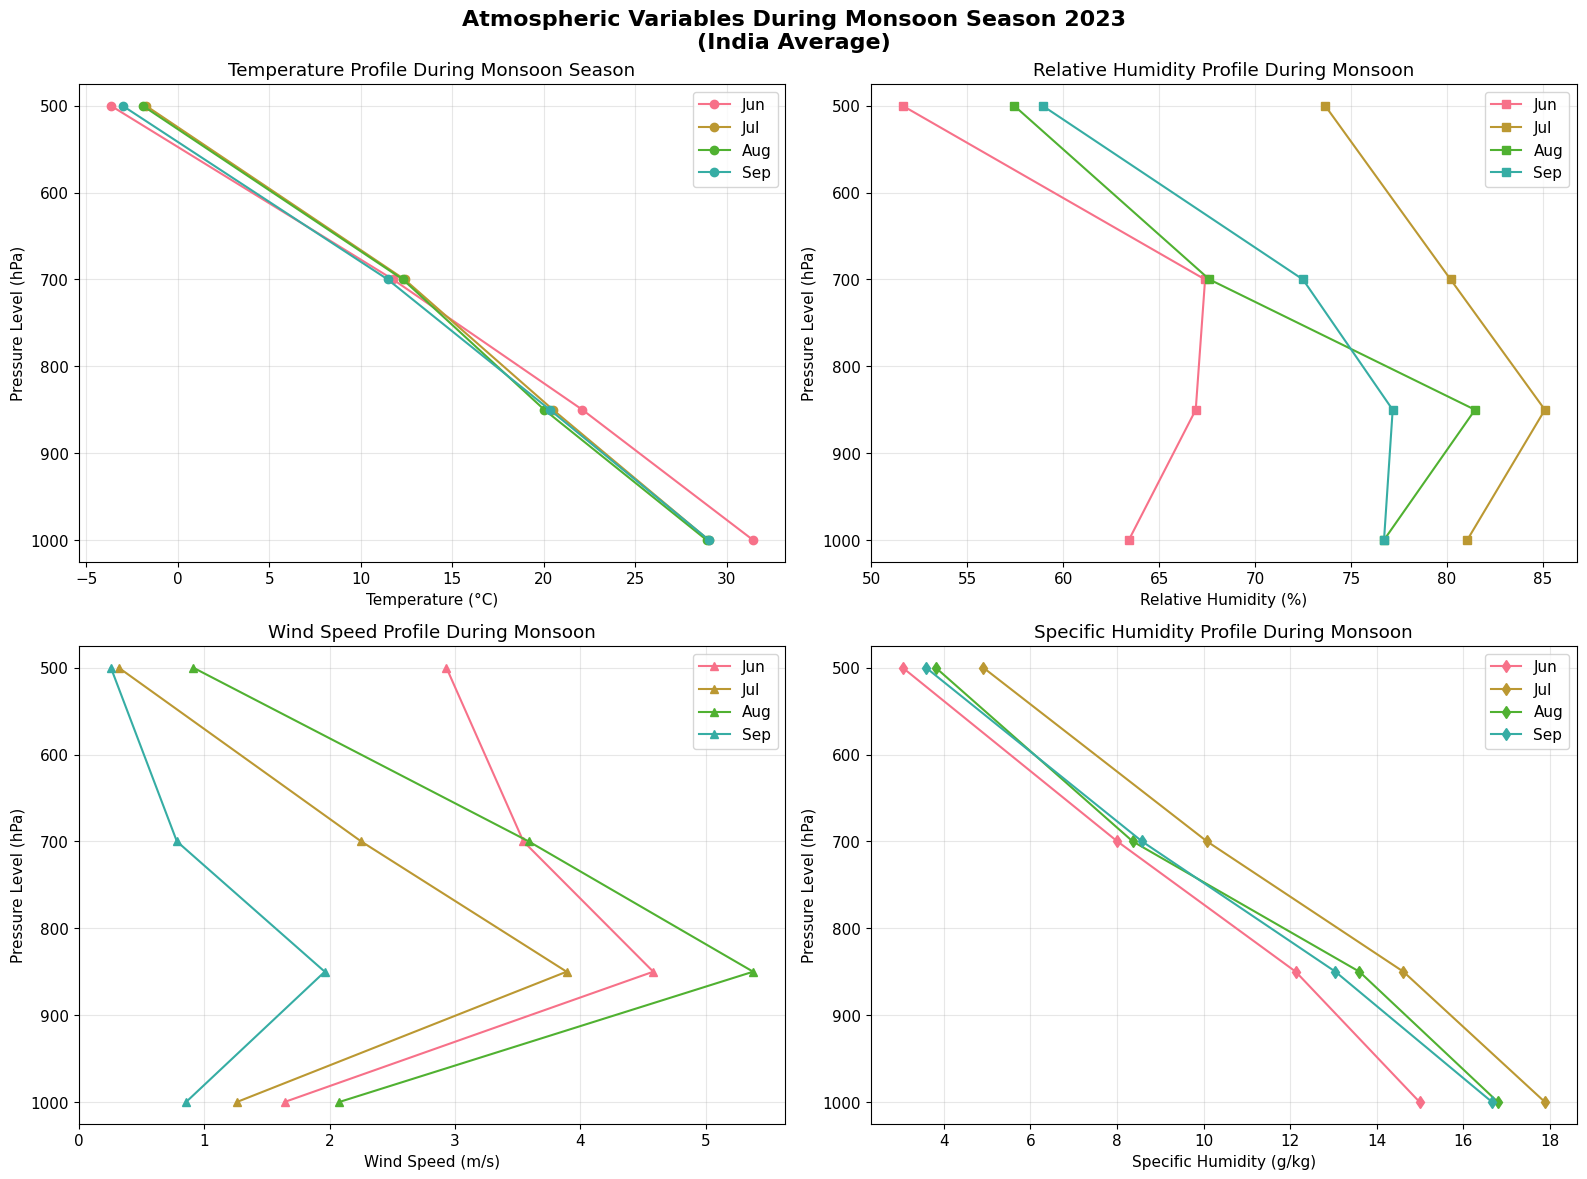

In [8]:
# Create comprehensive atmospheric analysis plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Temperature vs Pressure Level
for month in df_atmos_data["month"].unique():
    month_data = df_atmos_data[df_atmos_data["month"] == month]
    avg_temp = month_data.groupby("pressure_level")["temperature_c"].mean()
    month_name = calendar.month_abbr[int(month)]
    axes[0, 0].plot(avg_temp.values, avg_temp.index, marker="o", label=month_name)

axes[0, 0].set_ylabel("Pressure Level (hPa)")
axes[0, 0].set_xlabel("Temperature (°C)")
axes[0, 0].set_title("Temperature Profile During Monsoon Season")
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Plot 2: Relative Humidity vs Pressure Level
for month in df_atmos_data["month"].unique():
    month_data = df_atmos_data[df_atmos_data["month"] == month]
    avg_rh = month_data.groupby("pressure_level")["r"].mean()
    month_name = calendar.month_abbr[int(month)]
    axes[0, 1].plot(avg_rh.values, avg_rh.index, marker="s", label=month_name)

axes[0, 1].set_ylabel("Pressure Level (hPa)")
axes[0, 1].set_xlabel("Relative Humidity (%)")
axes[0, 1].set_title("Relative Humidity Profile During Monsoon")
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Plot 3: Wind Speed vs Pressure Level
for month in df_atmos_data["month"].unique():
    month_data = df_atmos_data[df_atmos_data["month"] == month]
    avg_wind = month_data.groupby("pressure_level")["wind_speed"].mean()
    month_name = calendar.month_abbr[int(month)]
    axes[1, 0].plot(avg_wind.values, avg_wind.index, marker="^", label=month_name)

axes[1, 0].set_ylabel("Pressure Level (hPa)")
axes[1, 0].set_xlabel("Wind Speed (m/s)")
axes[1, 0].set_title("Wind Speed Profile During Monsoon")
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Plot 4: Specific Humidity vs Pressure Level
for month in df_atmos_data["month"].unique():
    month_data = df_atmos_data[df_atmos_data["month"] == month]
    avg_q = month_data.groupby("pressure_level")["specific_humidity_gkg"].mean()
    month_name = calendar.month_abbr[int(month)]
    axes[1, 1].plot(avg_q.values, avg_q.index, marker="d", label=month_name)

axes[1, 1].set_ylabel("Pressure Level (hPa)")
axes[1, 1].set_xlabel("Specific Humidity (g/kg)")
axes[1, 1].set_title("Specific Humidity Profile During Monsoon")
axes[1, 1].invert_yaxis()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.suptitle(
    "Atmospheric Variables During Monsoon Season 2023\n(India Average)",
    fontsize=16,
    fontweight="bold",
    y=0.98,
)
plt.tight_layout()
plt.show()

## Comparing Single-Level vs Pressure-Level Data

Let's demonstrate the difference between surface (single-level) and atmospheric (pressure-level) temperature data.

In [9]:
# Extract single-level (surface) temperature data for comparison
df_surface = varunayan.era5ify_geojson(
    request_id="surface_temp_india_2023",
    variables=["2m_temperature"],  # Single-level variable
    start_date="2023-01-01",
    end_date="2023-12-31",
    json_file="https://gist.githubusercontent.com/JaggeryArray/26b6e4c09ce033305080253002c0ba76/raw/35d1ca0ca8ee64c4b5a0a8c4f22764cf6ac38bd4/india.geojson",
    frequency="monthly",
    resolution=0.25,
    # Note: no dataset_type parameter - defaults to single-level
)


STARTING ERA5 SINGLE LEVEL PROCESSING
Request ID: surface_temp_india_2023
Variables: ['2m_temperature']
Date Range: 2023-01-01 to 2023-12-31
Frequency: monthly
Resolution: 0.25°
GeoJSON File: /var/folders/gl/sfjd74gn0wv11h31lr8v2cj40000gn/T/surface_temp_india_2023_temp_geojson.json


--- GeoJSON Mini Map ---

MINI MAP (Longitude: 68.18° to 97.38°, Latitude: 8.13° to 37.08°):
┌──────────────────────────────┐
│······························│
│······■■■■■■··················│
│·······■■■■■··················│
│······■■■■■■■·················│
│····■■■■■■■■■■···········■■■■·│
│··■■■■■■■■■■■■■■■■■■··■■■■■···│
│·■■■■■■■■■■■■■■■■■■■■··■■■····│
│··■■■■■■■■■■■■■■■■■···········│
│·····■■■■■■■■■■■■·············│
│·····■■■■■■■■■■···············│
│······■■■■■■··················│
│·······■■■■■··················│
│········■■■■··················│
│······························│
└──────────────────────────────┘
 ■ = Inside the shape
 · = Outside the shape


2025-10-12 17:21:22,652 INFO Request ID is f4b34047-aae8-4476-8be8-3d2616d2a9a6
INFO:ecmwf.datastores.legacy_client:Request ID is f4b34047-aae8-4476-8be8-3d2616d2a9a6
2025-10-12 17:21:22,806 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-10-12 17:21:36,963 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


342ed8750aca6bfae2a3ac3fe63e1167.zip:   0%|          | 0.00/295k [00:00<?, ?B/s]


Saving files to output directory: surface_temp_india_2023_output
  Saved final data to: surface_temp_india_2023_output/surface_temp_india_2023_monthly_data.csv
  Saved unique coordinates to: surface_temp_india_2023_output/surface_temp_india_2023_unique_latlongs.csv
  Saved raw data to: surface_temp_india_2023_output/surface_temp_india_2023_raw_data.csv

PROCESSING COMPLETE

RESULTS SUMMARY:
----------------------------------------
Variables processed: 1
Time period:         2023-01-01 to 2023-12-31
Final output shape:  (12, 4)
Total complete processing time: 17.74 seconds

First 5 rows of aggregated data:
          t2m  year  month    feature
0  287.950928  2023      1  feature_0
1  291.993805  2023      2  feature_0
2  294.838806  2023      3  feature_0
3  298.150909  2023      4  feature_0
4  299.932617  2023      5  feature_0

ERA5 SINGLE LEVEL PROCESSING COMPLETED SUCCESSFULLY


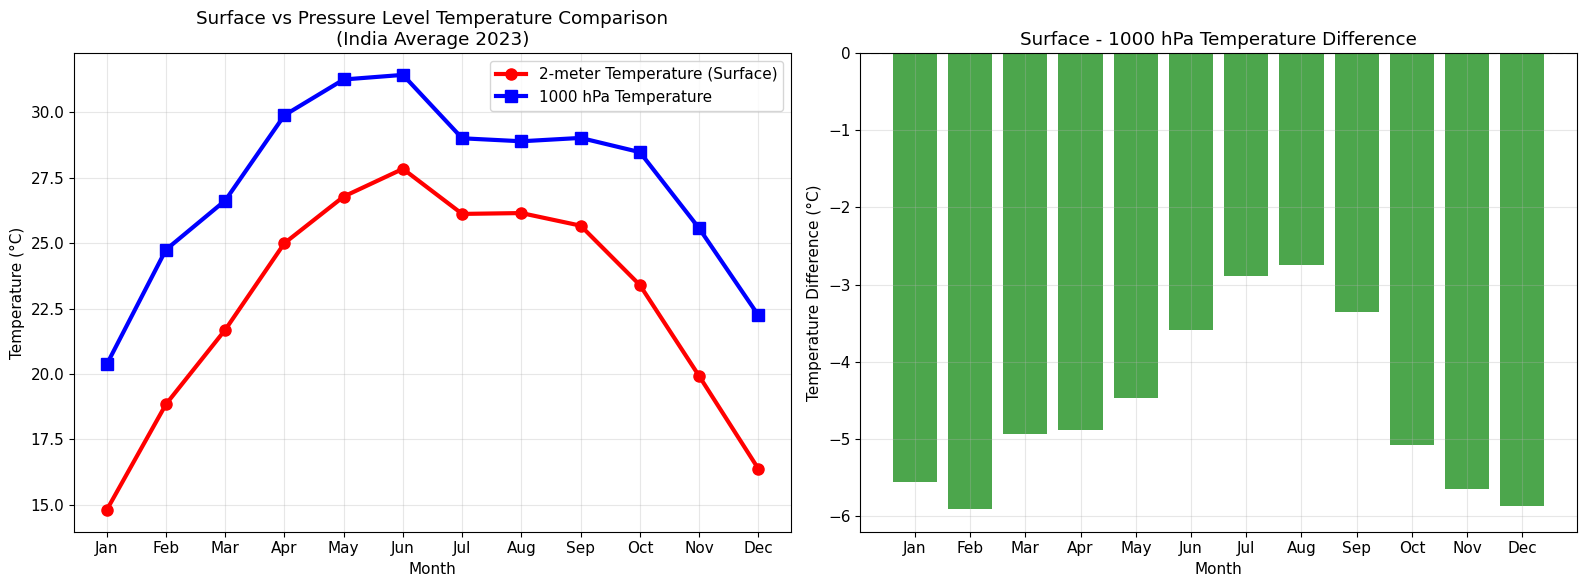

Average temperature difference (Surface - 1000 hPa): -4.58 °C
Maximum difference: -2.74 °C in Aug


In [10]:
# Load surface data
df_surface_data = pd.read_csv(
    "surface_temp_india_2023_output/surface_temp_india_2023_monthly_data.csv"
)
df_surface_data["temperature_c"] = df_surface_data["t2m"] - 273.15
df_surface_data["month_name"] = df_surface_data["month"].apply(
    lambda x: calendar.month_abbr[int(x)]
)

# Compare surface vs 1000 hPa temperature
surface_monthly = df_surface_data.groupby("month")["temperature_c"].mean()
pressure_1000_monthly = (
    df_temp[df_temp["pressure_level"] == 1000].groupby("month")["temperature_c"].mean()
)

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Monthly comparison
months = range(1, 13)
month_names = [calendar.month_abbr[i] for i in months]

ax1.plot(
    months,
    surface_monthly.values,
    marker="o",
    linewidth=3,
    markersize=8,
    label="2-meter Temperature (Surface)",
    color="red",
)
ax1.plot(
    months,
    pressure_1000_monthly.values,
    marker="s",
    linewidth=3,
    markersize=8,
    label="1000 hPa Temperature",
    color="blue",
)

ax1.set_xlabel("Month")
ax1.set_ylabel("Temperature (°C)")
ax1.set_title("Surface vs Pressure Level Temperature Comparison\n(India Average 2023)")
ax1.set_xticks(months)
ax1.set_xticklabels(month_names)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Temperature difference
temp_diff = surface_monthly.values - pressure_1000_monthly.values
ax2.bar(months, temp_diff, alpha=0.7, color="green")
ax2.set_xlabel("Month")
ax2.set_ylabel("Temperature Difference (°C)")
ax2.set_title("Surface - 1000 hPa Temperature Difference")
ax2.set_xticks(months)
ax2.set_xticklabels(month_names)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color="black", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

print(f"Average temperature difference (Surface - 1000 hPa): {temp_diff.mean():.2f} °C")
print(
    f"Maximum difference: {temp_diff.max():.2f} °C in {calendar.month_abbr[np.argmax(temp_diff) + 1]}"
)

## Atmospheric Stability

Let's calculate the atmospheric lapse rate to understand atmospheric stability during different seasons.

In [11]:
# Calculate lapse rate (temperature change with altitude)
# We'll use the temperature profile data from earlier


# Function to convert pressure to approximate altitude (using standard atmosphere)
def pressure_to_altitude(pressure_hpa):
    """Convert pressure (hPa) to approximate altitude (km) using standard atmosphere"""
    p0 = 1013.25  # Sea level pressure (hPa)
    return 44.33 * (1 - (pressure_hpa / p0) ** 0.1903)


# Calculate lapse rates for different seasons
lapse_rates = {}

for season, months in seasons.items():
    season_data = df_temp[df_temp["month"].isin(months)]

    # Get average temperature for each pressure level
    avg_temp_by_level = (
        season_data.groupby("pressure_level")["temperature_c"]
        .mean()
        .sort_index(ascending=False)
    )

    # Convert pressure levels to altitudes
    altitudes = [pressure_to_altitude(p) for p in avg_temp_by_level.index]
    temperatures = avg_temp_by_level.values

    # Calculate lapse rate (°C/km) between levels
    if len(altitudes) > 1:
        # Use linear regression to get overall lapse rate
        from scipy import stats

        slope, intercept, r_value, p_value, std_err = stats.linregress(
            altitudes, temperatures
        )
        lapse_rates[season] = (
            -slope
        )  # Negative because temperature decreases with altitude

    print(f"{season}: {-slope:.2f} °C/km (R² = {r_value**2:.3f})")

print(f"\nNote: The dry adiabatic lapse rate is ~9.8 °C/km")
print(f"The moist adiabatic lapse rate is ~6.5 °C/km")

Winter: 6.54 °C/km (R² = 0.998)
Pre-monsoon: 6.97 °C/km (R² = 1.000)
Monsoon: 6.48 °C/km (R² = 0.996)
Post-monsoon: 6.77 °C/km (R² = 0.998)

Note: The dry adiabatic lapse rate is ~9.8 °C/km
The moist adiabatic lapse rate is ~6.5 °C/km


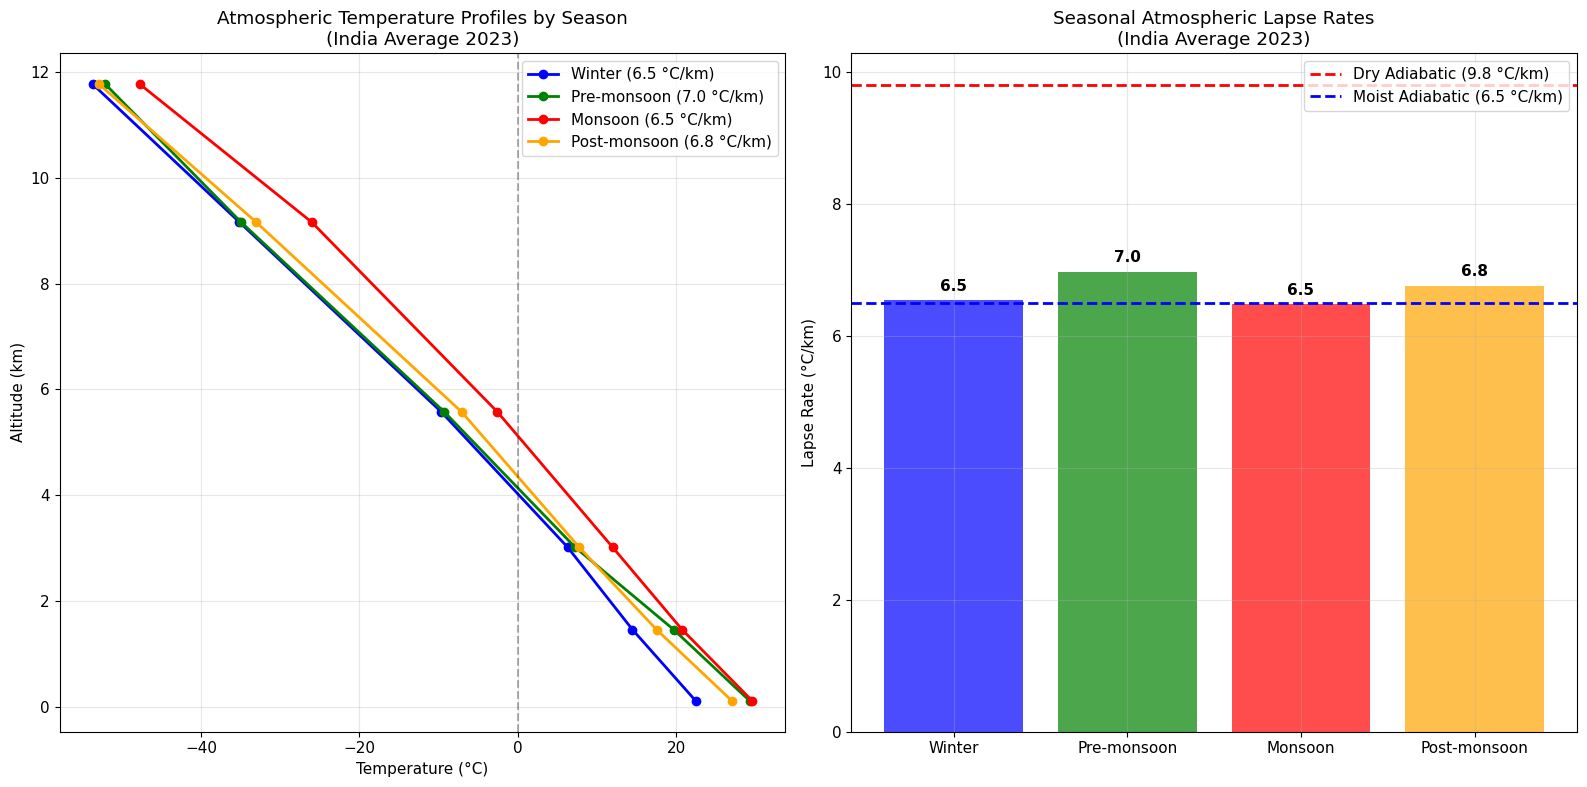

In [12]:
# Visualize atmospheric profiles with lapse rates
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Temperature vs Altitude profiles
colors = ["blue", "green", "red", "orange"]
for i, (season, months) in enumerate(seasons.items()):
    season_data = df_temp[df_temp["month"].isin(months)]
    avg_temp_by_level = (
        season_data.groupby("pressure_level")["temperature_c"]
        .mean()
        .sort_index(ascending=False)
    )

    altitudes = [pressure_to_altitude(p) for p in avg_temp_by_level.index]
    temperatures = avg_temp_by_level.values

    ax1.plot(
        temperatures,
        altitudes,
        marker="o",
        linewidth=2,
        markersize=6,
        label=f"{season} ({lapse_rates[season]:.1f} °C/km)",
        color=colors[i],
    )

ax1.set_xlabel("Temperature (°C)")
ax1.set_ylabel("Altitude (km)")
ax1.set_title("Atmospheric Temperature Profiles by Season\n(India Average 2023)")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add reference lines for standard lapse rates
ax1.axvline(x=0, color="black", linestyle="--", alpha=0.3, label="0°C")

# Plot 2: Lapse rate comparison
seasons_list = list(lapse_rates.keys())
lapse_values = list(lapse_rates.values())

bars = ax2.bar(seasons_list, lapse_values, alpha=0.7, color=colors[: len(seasons_list)])
ax2.axhline(
    y=9.8, color="red", linestyle="--", linewidth=2, label="Dry Adiabatic (9.8 °C/km)"
)
ax2.axhline(
    y=6.5,
    color="blue",
    linestyle="--",
    linewidth=2,
    label="Moist Adiabatic (6.5 °C/km)",
)

ax2.set_ylabel("Lapse Rate (°C/km)")
ax2.set_title("Seasonal Atmospheric Lapse Rates\n(India Average 2023)")
ax2.grid(True, alpha=0.3)
ax2.legend()

# Add value labels on bars
for bar, value in zip(bars, lapse_values):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.1,
        f"{value:.1f}",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

## Calculating Wet Bulb Temperature

Wet bulb temperature is a critical parameter for heat stress analysis, combining the effects of temperature and humidity. It represents the lowest temperature that can be reached by evaporative cooling and is particularly important for human health and environmental studies.

### Understanding Wet Bulb Temperature

**Wet Bulb Temperature (Tw)** is the temperature read by a thermometer wrapped in a wet cloth over which air is passed. It incorporates both temperature and humidity effects:

- **Below 32°C**: Generally safe for most people
- **32-35°C**: Dangerous for prolonged exposure and physical activity  
- **Above 35°C**: Theoretically unsurvivable for humans without cooling

Let's calculate wet bulb temperature using our pressure level data with temperature and relative humidity.

In [13]:
# Wet bulb temperature calculation functions
def saturation_vapor_pressure(temp_c):
    """
    Calculate saturation vapor pressure using Tetens formula
    Args:
        temp_c: Temperature in Celsius
    Returns:
        Saturation vapor pressure in hPa
    """
    return 6.112 * np.exp(17.67 * temp_c / (temp_c + 243.5))


def wet_bulb_temperature_simple(temp_c, rh_percent, pressure_hpa=1013.25):
    """
    Calculate wet bulb temperature using Stull (2011) approximation

    Args:
        temp_c: Temperature in Celsius
        rh_percent: Relative humidity in percent (0-100)
        pressure_hpa: Atmospheric pressure in hPa (default: sea level)

    Returns:
        Wet bulb temperature in Celsius
    """
    # Stull (2011) approximation - good for most conditions
    # source: https://journals.ametsoc.org/view/journals/apme/50/11/jamc-d-11-0143.1.xml
    tw = (
        temp_c * np.arctan(0.151977 * np.sqrt(rh_percent + 8.313659))
        + np.arctan(temp_c + rh_percent)
        - np.arctan(rh_percent - 1.676331)
        + 0.00391838 * (rh_percent**1.5) * np.arctan(0.023101 * rh_percent)
        - 4.686035
    )

    return tw


def wet_bulb_temperature_iterative(temp_c, rh_percent, pressure_hpa=1013.25):
    """
    Calculate wet bulb temperature using iterative psychrometric method
    More accurate but computationally intensive

    Args:
        temp_c: Temperature in Celsius
        rh_percent: Relative humidity in percent (0-100)
        pressure_hpa: Atmospheric pressure in hPa

    Returns:
        Wet bulb temperature in Celsius
    """
    # Convert inputs to arrays for vectorized operations
    temp_c = np.asarray(temp_c)
    rh_percent = np.asarray(rh_percent)
    pressure_hpa = np.asarray(pressure_hpa)

    # Initial guess (use simple approximation)
    tw = wet_bulb_temperature_simple(temp_c, rh_percent, pressure_hpa)

    # Iterative improvement (Newton-Raphson method)
    for _ in range(10):  # Usually converges in 3-5 iterations
        # Calculate saturation vapor pressure at wet bulb temperature
        es_tw = saturation_vapor_pressure(tw)

        # Calculate actual vapor pressure from dry bulb temp and RH
        es_t = saturation_vapor_pressure(temp_c)
        e = es_t * rh_percent / 100.0

        # Psychrometric equation: e = es(Tw) - A * P * (T - Tw)
        # Where A is psychrometric constant (~0.000665)
        A = 0.000665 * pressure_hpa / 1013.25  # Adjust for pressure

        # Function: f(Tw) = es(Tw) - A * P * (T - Tw) - e
        f = es_tw - A * pressure_hpa * (temp_c - tw) - e

        # Derivative: f'(Tw) = des/dTw + A * P
        # where des/dTw is derivative of saturation vapor pressure
        des_dtw = es_tw * 17.67 * 243.5 / ((tw + 243.5) ** 2)
        df = des_dtw + A * pressure_hpa

        # Newton-Raphson update
        tw_new = tw - f / df

        # Check convergence
        if np.all(np.abs(tw_new - tw) < 0.01):
            break

        tw = tw_new

    return tw


# Test the functions with sample data
print("Testing wet bulb temperature calculations:")
print("Temperature: 35°C, RH: 60%, Pressure: 1000 hPa")

test_temp = 35.0
test_rh = 60.0
test_pressure = 1000.0

tw_simple = wet_bulb_temperature_simple(test_temp, test_rh, test_pressure)
tw_iterative = wet_bulb_temperature_iterative(test_temp, test_rh, test_pressure)

print(f"Simple method: {tw_simple:.2f}°C")
print(f"Iterative method: {tw_iterative:.2f}°C")
print(f"Difference: {abs(tw_simple - tw_iterative):.3f}°C")

Testing wet bulb temperature calculations:
Temperature: 35°C, RH: 60%, Pressure: 1000 hPa
Simple method: 28.49°C
Iterative method: 28.20°C
Difference: 0.288°C


In [14]:
# Calculate wet bulb temperature for our atmospheric data
# Using the multi-variable data from Example 2

# Apply wet bulb temperature calculation to our data
df_atmos_data["wet_bulb_temp_c"] = wet_bulb_temperature_iterative(
    df_atmos_data["temperature_c"],
    df_atmos_data["r"],
    df_atmos_data["pressure_level"],  # Use pressure level as atmospheric pressure
)

# Also calculate using simple method for comparison
df_atmos_data["wet_bulb_temp_simple_c"] = wet_bulb_temperature_simple(
    df_atmos_data["temperature_c"], df_atmos_data["r"], df_atmos_data["pressure_level"]
)

print("Wet bulb temperature statistics for monsoon season 2023:")
print(
    f"Range (iterative): {df_atmos_data['wet_bulb_temp_c'].min():.1f} to {df_atmos_data['wet_bulb_temp_c'].max():.1f}°C"
)
print(
    f"Range (simple): {df_atmos_data['wet_bulb_temp_simple_c'].min():.1f} to {df_atmos_data['wet_bulb_temp_simple_c'].max():.1f}°C"
)
print(
    f"Average difference between methods: {abs(df_atmos_data['wet_bulb_temp_c'] - df_atmos_data['wet_bulb_temp_simple_c']).mean():.3f}°C"
)

# Check for dangerous wet bulb temperatures (>32°C)
dangerous_wb = df_atmos_data[df_atmos_data["wet_bulb_temp_c"] > 32]
if len(dangerous_wb) > 0:
    print(
        f"\nDangerous wet bulb temperatures (>32°C) found in {len(dangerous_wb)} records:"
    )
    print(
        f"Maximum wet bulb temperature: {dangerous_wb['wet_bulb_temp_c'].max():.1f}°C"
    )
    print(
        f"At pressure level: {dangerous_wb.loc[dangerous_wb['wet_bulb_temp_c'].idxmax(), 'level']} hPa"
    )
    print(
        f"Month: {dangerous_wb.loc[dangerous_wb['wet_bulb_temp_c'].idxmax(), 'month_name']}"
    )
else:
    print(f"\nNo dangerous wet bulb temperatures (>32°C) found during monsoon season.")

# Show sample of data with wet bulb temperatures
print("\nSample data with wet bulb temperatures:")
sample_data = df_atmos_data[
    ["month", "pressure_level", "temperature_c", "r", "wet_bulb_temp_c"]
].head(10)
print(sample_data.round(2))

Wet bulb temperature statistics for monsoon season 2023:
Range (iterative): -8.5 to 26.3°C
Range (simple): -6.6 to 26.3°C
Average difference between methods: 0.515°C

No dangerous wet bulb temperatures (>32°C) found during monsoon season.

Sample data with wet bulb temperatures:
   month  pressure_level  temperature_c      r  wet_bulb_temp_c
0      6          1000.0          31.43  63.42            25.69
1      7          1000.0          29.01  81.06            26.32
2      8          1000.0          28.90  76.72            25.56
3      9          1000.0          29.02  76.73            25.68
4      6           850.0          22.11  66.91            17.50
5      7           850.0          20.50  85.12            18.60
6      8           850.0          20.03  81.47            17.67
7      9           850.0          20.33  77.18            17.36
8      6           700.0          11.76  67.40             7.80
9      7           700.0          12.39  80.20            10.03


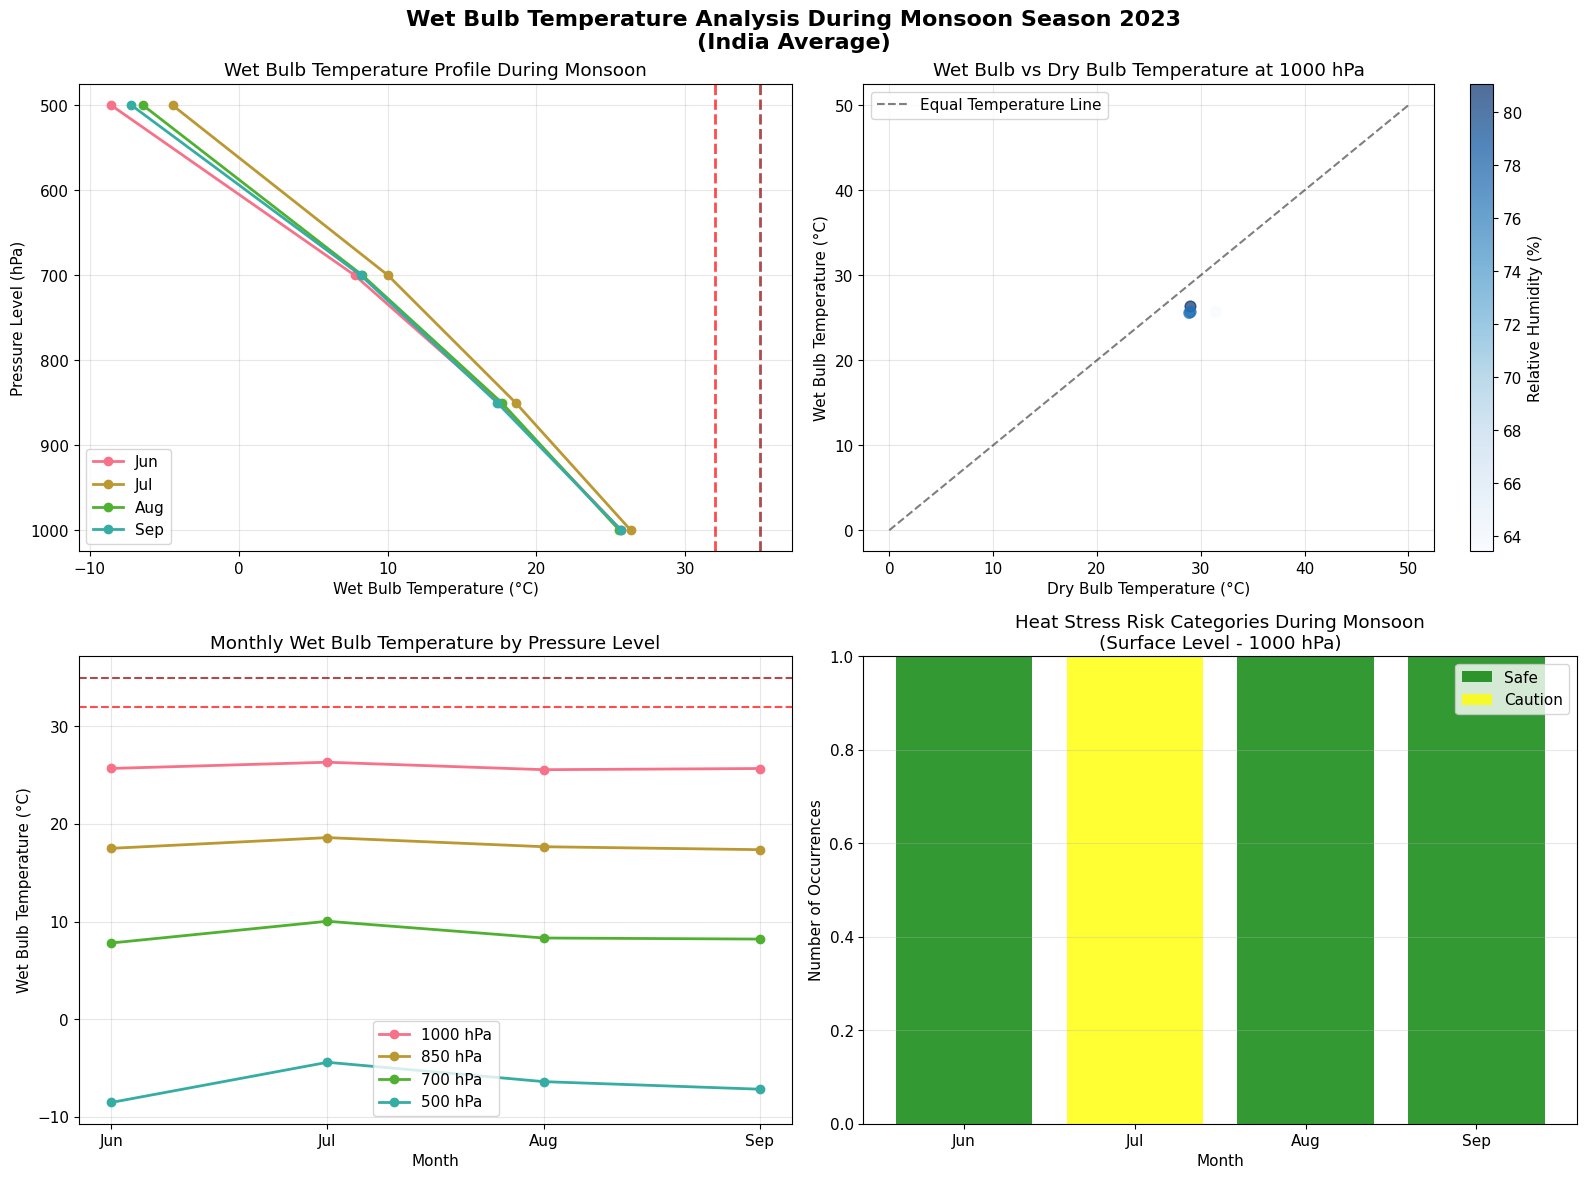

In [15]:
# Visualize wet bulb temperature analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Wet Bulb Temperature vs Pressure Level by Month
for month in df_atmos_data["month"].unique():
    month_data = df_atmos_data[df_atmos_data["month"] == month]
    avg_wb = month_data.groupby("pressure_level")["wet_bulb_temp_c"].mean()
    month_name = calendar.month_abbr[int(month)]
    axes[0, 0].plot(
        avg_wb.values,
        avg_wb.index,
        marker="o",
        linewidth=2,
        markersize=6,
        label=month_name,
    )

axes[0, 0].set_ylabel("Pressure Level (hPa)")
axes[0, 0].set_xlabel("Wet Bulb Temperature (°C)")
axes[0, 0].set_title("Wet Bulb Temperature Profile During Monsoon")
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Add danger threshold line
axes[0, 0].axvline(
    x=32,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Danger Threshold (32°C)",
)
axes[0, 0].axvline(
    x=35,
    color="darkred",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="Extreme Danger (35°C)",
)

# Plot 2: Temperature vs Wet Bulb Temperature Scatter
surface_data = df_atmos_data[
    df_atmos_data["pressure_level"] == 1000
]  # Focus on surface level
scatter = axes[0, 1].scatter(
    surface_data["temperature_c"],
    surface_data["wet_bulb_temp_c"],
    c=surface_data["r"],
    cmap="Blues",
    alpha=0.7,
    s=60,
)
axes[0, 1].plot([0, 50], [0, 50], "k--", alpha=0.5, label="Equal Temperature Line")
axes[0, 1].set_xlabel("Dry Bulb Temperature (°C)")
axes[0, 1].set_ylabel("Wet Bulb Temperature (°C)")
axes[0, 1].set_title("Wet Bulb vs Dry Bulb Temperature at 1000 hPa")
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Add colorbar for humidity
cbar = plt.colorbar(scatter, ax=axes[0, 1])
cbar.set_label("Relative Humidity (%)")

# Plot 3: Monthly Average Wet Bulb Temperature by Level
monthly_wb = (
    df_atmos_data.groupby(["month", "pressure_level"])["wet_bulb_temp_c"]
    .mean()
    .unstack()
)
key_levels = [1000, 850, 700, 500]

for level in key_levels:
    if level in monthly_wb.columns:
        axes[1, 0].plot(
            monthly_wb.index,
            monthly_wb[level],
            marker="o",
            linewidth=2,
            markersize=6,
            label=f"{level} hPa",
        )

axes[1, 0].set_xlabel("Month")
axes[1, 0].set_ylabel("Wet Bulb Temperature (°C)")
axes[1, 0].set_title("Monthly Wet Bulb Temperature by Pressure Level")
axes[1, 0].set_xticks(df_atmos_data["month"].unique())
axes[1, 0].set_xticklabels(
    [calendar.month_abbr[int(m)] for m in df_atmos_data["month"].unique()]
)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Add danger threshold lines
axes[1, 0].axhline(y=32, color="red", linestyle="--", alpha=0.7, label="Danger (32°C)")
axes[1, 0].axhline(
    y=35, color="darkred", linestyle="--", alpha=0.7, label="Extreme (35°C)"
)


# Plot 4: Heat Stress Risk Assessment
# Create bins for wet bulb temperature categories
def categorize_heat_stress(wb_temp):
    if wb_temp < 26:
        return "Safe"
    elif wb_temp < 28:
        return "Caution"
    elif wb_temp < 30:
        return "Extreme Caution"
    elif wb_temp < 32:
        return "Danger"
    else:
        return "Extreme Danger"


# Apply categorization to surface level data
surface_data = df_atmos_data[df_atmos_data["pressure_level"] == 1000].copy()
surface_data["heat_stress_category"] = surface_data["wet_bulb_temp_c"].apply(
    categorize_heat_stress
)

# Count occurrences by category and month
heat_stress_counts = (
    surface_data.groupby(["month", "heat_stress_category"]).size().unstack(fill_value=0)
)

# Create stacked bar chart
bottom = np.zeros(len(heat_stress_counts))
colors = ["green", "yellow", "orange", "red", "darkred"]
categories = ["Safe", "Caution", "Extreme Caution", "Danger", "Extreme Danger"]

for i, category in enumerate(categories):
    if category in heat_stress_counts.columns:
        axes[1, 1].bar(
            heat_stress_counts.index,
            heat_stress_counts[category],
            bottom=bottom,
            label=category,
            color=colors[i],
            alpha=0.8,
        )
        bottom += heat_stress_counts[category]

axes[1, 1].set_xlabel("Month")
axes[1, 1].set_ylabel("Number of Occurrences")
axes[1, 1].set_title(
    "Heat Stress Risk Categories During Monsoon\n(Surface Level - 1000 hPa)"
)
axes[1, 1].set_xticks(heat_stress_counts.index)
axes[1, 1].set_xticklabels(
    [calendar.month_abbr[int(m)] for m in heat_stress_counts.index]
)
axes[1, 1].grid(True, alpha=0.3, axis="y")
axes[1, 1].legend()

plt.suptitle(
    "Wet Bulb Temperature Analysis During Monsoon Season 2023\n(India Average)",
    fontsize=16,
    fontweight="bold",
    y=0.98,
)
plt.tight_layout()
plt.show()



Happy analyzing atmospheric data with varunayan! 🌤️